In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import sys
import after_subtle.module as asmod
import after_subtle.util as asutil
import after_subtle.stats as asstats


import Project.SDSBD.results1.params as params
min_occurrence = params.min_occurrence

DIR = {
    'preSD_C': params.DIR_preSD_C,
    'preSD_R': params.DIR_preSD_R,
    'preSD_S': params.DIR_preSD_S,
    'preSD_S_extreme': params.DIR_preSD_S_extreme
    }   # directory of the data extracted from the subtle

SAVE_DIR_LIST = {
    'preSD_C': params.SAVE_DIR_pre,
    'preSD_R': params.SAVE_DIR_pre,
    'preSD_S': params.SAVE_DIR_pre,
    'preSD_S_extreme': params.SAVE_DIR_pre
    }   # directory to save the analysis from after_subtle

COORDS_DIR = {
    'preSD_C': params.COORDS_DIR_pre,
    'preSD_R': params.COORDS_DIR_pre,
    'preSD_S': params.COORDS_DIR_pre,
    'preSD_S_extreme': params.COORDS_DIR_pre
    }   # directory of the coordinates of groups

# calculate the density map
analysis_names = ['preSD_C', 'preSD_R', 'preSD_S', 'preSD_S_extreme']

# color map
color1 = (144/255, 144/255, 144/255)  # control group color code
color2 = (62/255, 140/255, 87/255)  # resilient color code
color3 = (238/255, 182/255, 76/255)  # susceptible color code
color4 = (199/255, 135/255, 19/255)  # susceptible_extreme color code

color_list = {    
    'preSD_C': color1,
    'preSD_R': color2,
    'preSD_S': color3,
    'preSD_S_extreme': color4
    }   # directory of the color code of groups

sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl

Draw density map in a group

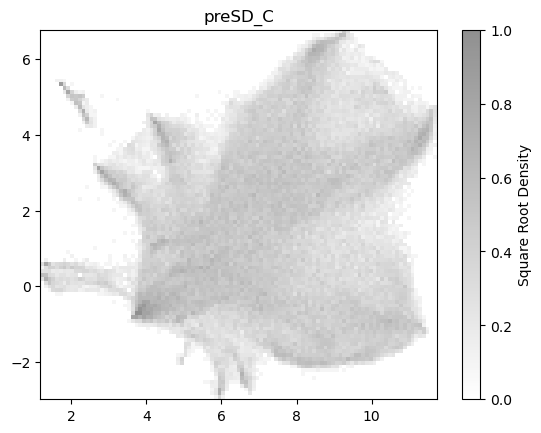

In [7]:
Draw_name = 'preSD_C'

# use glob to find all subdirectories containing the desired files
Draw_DIR = DIR[Draw_name]
SAVE_DIR = SAVE_DIR_LIST[Draw_name]
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
folder_list = acl.get_csv_paths(Draw_DIR)

# Compute the density map
color_code = color_list[Draw_name]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, 'white'), (1, color_code)])

asmod.density_map(folder_list, cmap=cmap)

plt.title(Draw_name)
plt.savefig(os.path.join(SAVE_DIR, Draw_name)+'_density_map.pdf', transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, Draw_name)+'_density_map.png', transparent=False, dpi=300)
plt.show()

Differential density map for two groups (ex. WT vs. KO)

['C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_102', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_103', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_106', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_107', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_108', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_111', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_113', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_114', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_115', 'C:\\Users\\MyPC\\Desktop\\git\\SUBTLE_June\\project\\SDSBD\\model2\\results_testset1\\preSD_202', 'C:\\User

c:\Users\MyPC\Desktop\git\after_subtle\after_subtle\module.py:243: RuntimeWarning: invalid value encountered in sqrt
  dendiff_sqrt = np.where(dendiff >= 0, np.sqrt(dendiff), -np.sqrt(np.abs(dendiff)))


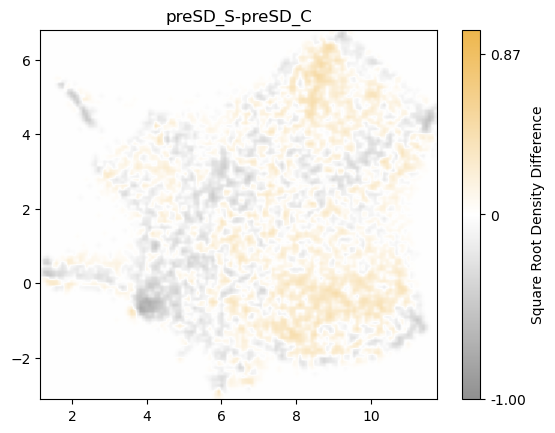

In [21]:
group1 = 'preSD_S'
group2 = 'preSD_R'
SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')

if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

##
pair_name = group1 + '-' + group2

# find all subdirectories containing the desired files for Group 1
DIR1 = DIR[group1]
group1_folder_list = acl.get_csv_paths(DIR1)
print(group1_folder_list)

# find all subdirectories containing the desired files for Group 2
DIR2 = DIR[group2]
group2_folder_list = acl.get_csv_paths(DIR2)
print(group2_folder_list)

# Define the colors
color_code_group1 = color_list[group1]
color_code_group2 = color_list[group2]
cmap_both = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, color_code_group2), (0.5, 'white'), (1, color_code_group1)])
cmap = cmap_both

# Draw
asmod.draw_dendiff_sqrt(group1_folder_list, group2_folder_list, cmap=cmap, bin_size=0.08)
plt.title(pair_name)
plt.savefig(os.path.join(SAVE_DIR, pair_name) + '_norm.pdf', transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, pair_name) + '_norm.png', transparent=False, dpi=300)

Draw behavioral density heatmap for all groups

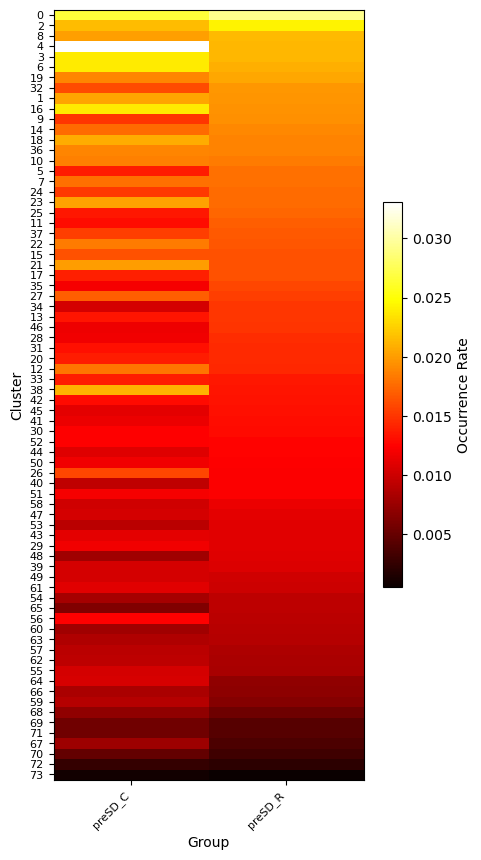

In [18]:
import after_subtle.module as asmod
import matplotlib.pyplot as plt
import os

subcluster_num = params.subcluster_num

group = 3
if group == 1:
    group1 = 'preSD_S'
elif group == 2:
    group1 = 'preSD_S_extreme'
# elif group == 3:
#     group1 = 'preSD_C'
group2 = 'preSD_R'  # reference group

SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

##
# Define the directory
DIR1 = DIR[group1]
DIR2 = DIR[group2]
group1_folder_list = acl.get_csv_paths(DIR1)
group2_folder_list = acl.get_csv_paths(DIR2)

# calculate the density map
group_folder_lists = [group1_folder_list, group2_folder_list]
group_names = [group1, group2]
group_ref = [group2] # cluster aligned to the order of 'group_ref'

cluster_counts = asmod.compare_cluster_occurrence(group_folder_lists, group_names, subcluster_number=subcluster_num, target_groups=group_ref)

# Apply square root transformation
#cluster_counts_sqrt = np.sqrt(cluster_counts)

# grouped_clusters = [f"{i}-{i+2}" for i in range(0, len(cluster_counts), 3)]
cluster_counts = cluster_counts.iloc[:,:]

fig, ax = plt.subplots(figsize=(5, 10))  # Increase the figure size

im = ax.imshow(cluster_counts.values, cmap='hot', aspect='auto')
ax.set_xticks(range(len(cluster_counts.columns)))
ax.set_xticklabels(cluster_counts.columns, fontsize=8, rotation=45, ha='right')

# Adjust the spacing between the ticks on the y-axis
ax.set_yticks(range(len(cluster_counts.index)))
ax.set_yticklabels(cluster_counts.index, fontsize=8)  # Increase the font size for y-axis ticks
    
plt.xlabel('Group')
plt.ylabel('Cluster')
cbar = plt.colorbar(im, label='Occurrence Rate',shrink=0.5)

filename_save = 'heatmap_cluster_occurrence_' + group1 + ',' + group2
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.png'), transparent=False, dpi=300)

### Draw difference of behavioral usages between groups

    preSD_108  preSD_111  preSD_113  preSD_114  preSD_203  preSD_212  \
0    0.029500   0.011500   0.025083   0.016833   0.029417   0.018417   
1    0.022250   0.025250   0.015167   0.016917   0.017167   0.021833   
2    0.018667   0.008667   0.016333   0.010083   0.021833   0.015000   
3    0.020167   0.025333   0.015833   0.025583   0.030417   0.018750   
4    0.034750   0.010250   0.021833   0.070000   0.059333   0.028583   
..        ...        ...        ...        ...        ...        ...   
69   0.005583   0.007833   0.008833   0.009167   0.003083   0.006083   
70   0.003667   0.004583   0.002500   0.001500   0.004833   0.004333   
71   0.002583   0.004333   0.002750   0.001833   0.005833   0.004333   
72   0.002250   0.002917   0.001667   0.002417   0.002333   0.010333   
73   0.000000   0.001333   0.000417   0.000167   0.000417   0.001083   

    preSD_214  preSD_218  preSD_219  preSD_301  preSD_307  preSD_310  \
0    0.026583   0.026667   0.022167   0.016169   0.032169   0.0

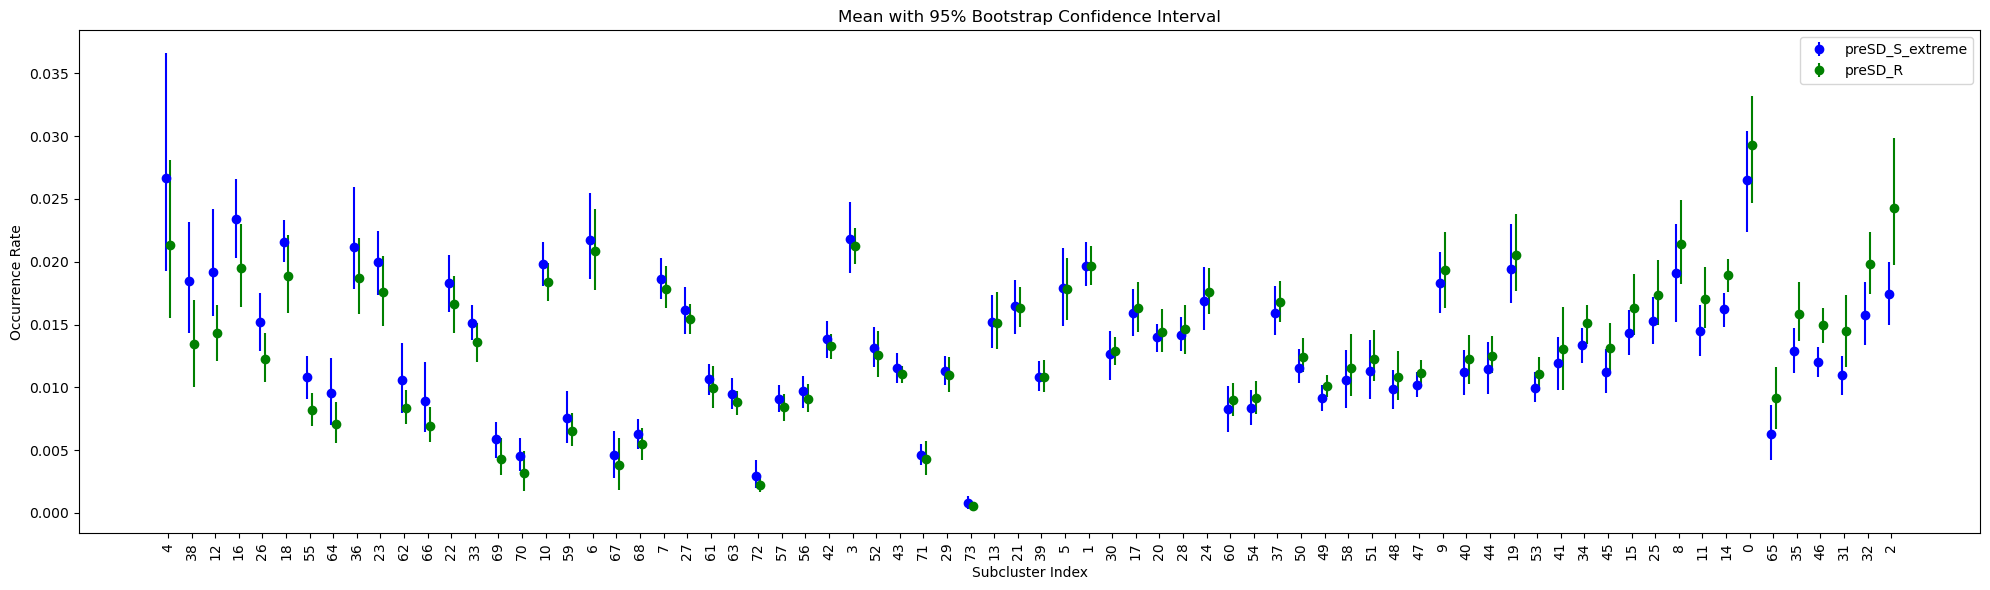

In [3]:
###########################################
# Params setting
cluster_name = 'subcluster'

group = 2
if group == 1:
    group1 = 'preSD_S'
elif group == 2:
    group1 = 'preSD_S_extreme'
# elif group == 3:
#     group1 = 'preSD_C'
group2 = 'preSD_R'  # reference group

###########################################
subcluster_num = params.subcluster_num
supercluster_num = params.supercluster_num

if cluster_name == 'subcluster':
    cluster_num = subcluster_num
elif cluster_name == 'supercluster':
    cluster_num = supercluster_num

SAVE_DIR = os.path.join(SAVE_DIR_LIST[group1],'dendiff')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# Define the colors
color_code_group1 = color_list[group1]
color_code_group2 = color_list[group2]

group1_folder_list = acl.get_csv_paths(DIR[group1])
group2_folder_list = acl.get_csv_paths(DIR[group2])

# Calculate the density map
try:
    cluster_counts1 = asmod.calculate_filewise_cluster_occurrence(group1_folder_list, cluster_num, cluster_name)
    print(cluster_counts1)
except ValueError as e:
    print(e)

try:
    cluster_counts2 = asmod.calculate_filewise_cluster_occurrence(group2_folder_list, cluster_num, cluster_name)
    print(cluster_counts2)
except ValueError as e:
    print(e)

# Calculate the mean and standard deviation of the occurrence rate for each cluster
group1_means = cluster_counts1.mean(axis=1)
group2_means = cluster_counts2.mean(axis=1)

# Calculate the mean ratios
mean_ratios = group1_means - group2_means
#mean_ratios = (group1_means - group2_means) / (group1_means + group2_means)

sorted_indices = mean_ratios.sort_values(ascending=False).index # Sort the mean ratios in descending order along with their indices

# Calculate bootstrap confidence intervals for each subcluster
group1_conf_intervals = [asstats.bootstrap_confidence_interval(cluster_counts1.loc[cluster]) for cluster in sorted_indices]
group2_conf_intervals = [asstats.bootstrap_confidence_interval(cluster_counts2.loc[cluster]) for cluster in sorted_indices]

# Calculate confidence intervals for error bars
group1_errors = [(group1_means[cluster] - interval[0], interval[1] - group1_means[cluster]) for cluster, interval in zip(sorted_indices, group1_conf_intervals)]
group2_errors = [(group2_means[cluster] - interval[0], interval[1] - group2_means[cluster]) for cluster, interval in zip(sorted_indices, group2_conf_intervals)]

# Plotting
fig, ax = plt.subplots(figsize=(20, 6))

# Define offset for x positions
offset = 0.1  # Adjust this offset value as needed

# Plot data (shift x position to the left by the offset)
ax.errorbar(x=np.array(range(len(sorted_indices))) - offset, y=group1_means[sorted_indices], yerr=np.array(group1_errors).T, fmt='o', label=group1, color='blue')
ax.errorbar(x=np.array(range(len(sorted_indices))) + offset, y=group2_means[sorted_indices], yerr=np.array(group2_errors).T, fmt='o', label=group2, color='green')

# Adjust the position of the X-axis label
labels = []
for i, label in enumerate(sorted_indices):
    labels.append(plt.Text(i, 0, str(label), ha='center', va='center', fontsize=8))

# Adjust odd label position
for i in range(1, len(labels), 2):
    labels[i].set_position((i, -0.1))  # Move odd labels further down

ax.set_xticks(range(len(sorted_indices)))
ax.set_xticklabels(labels, rotation=90)

# Set the x-axis and y-axis labels and title
if cluster_name == 'subcluster':
    ax.set_xlabel('Subcluster Index')
elif cluster_name == 'supercluster':
    ax.set_xlabel('Supercluster Index')
ax.set_ylabel('Occurrence Rate')
ax.set_title('Mean with 95% Bootstrap Confidence Interval')
ax.legend()

# Adjust the spacing to prevent overlapping labels
fig.tight_layout()

# Save the figure
filename_save = cluster_name + '_mean_std_' + group1 + ',' + group2
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.png'), transparent=False, dpi=300)

plt.show()

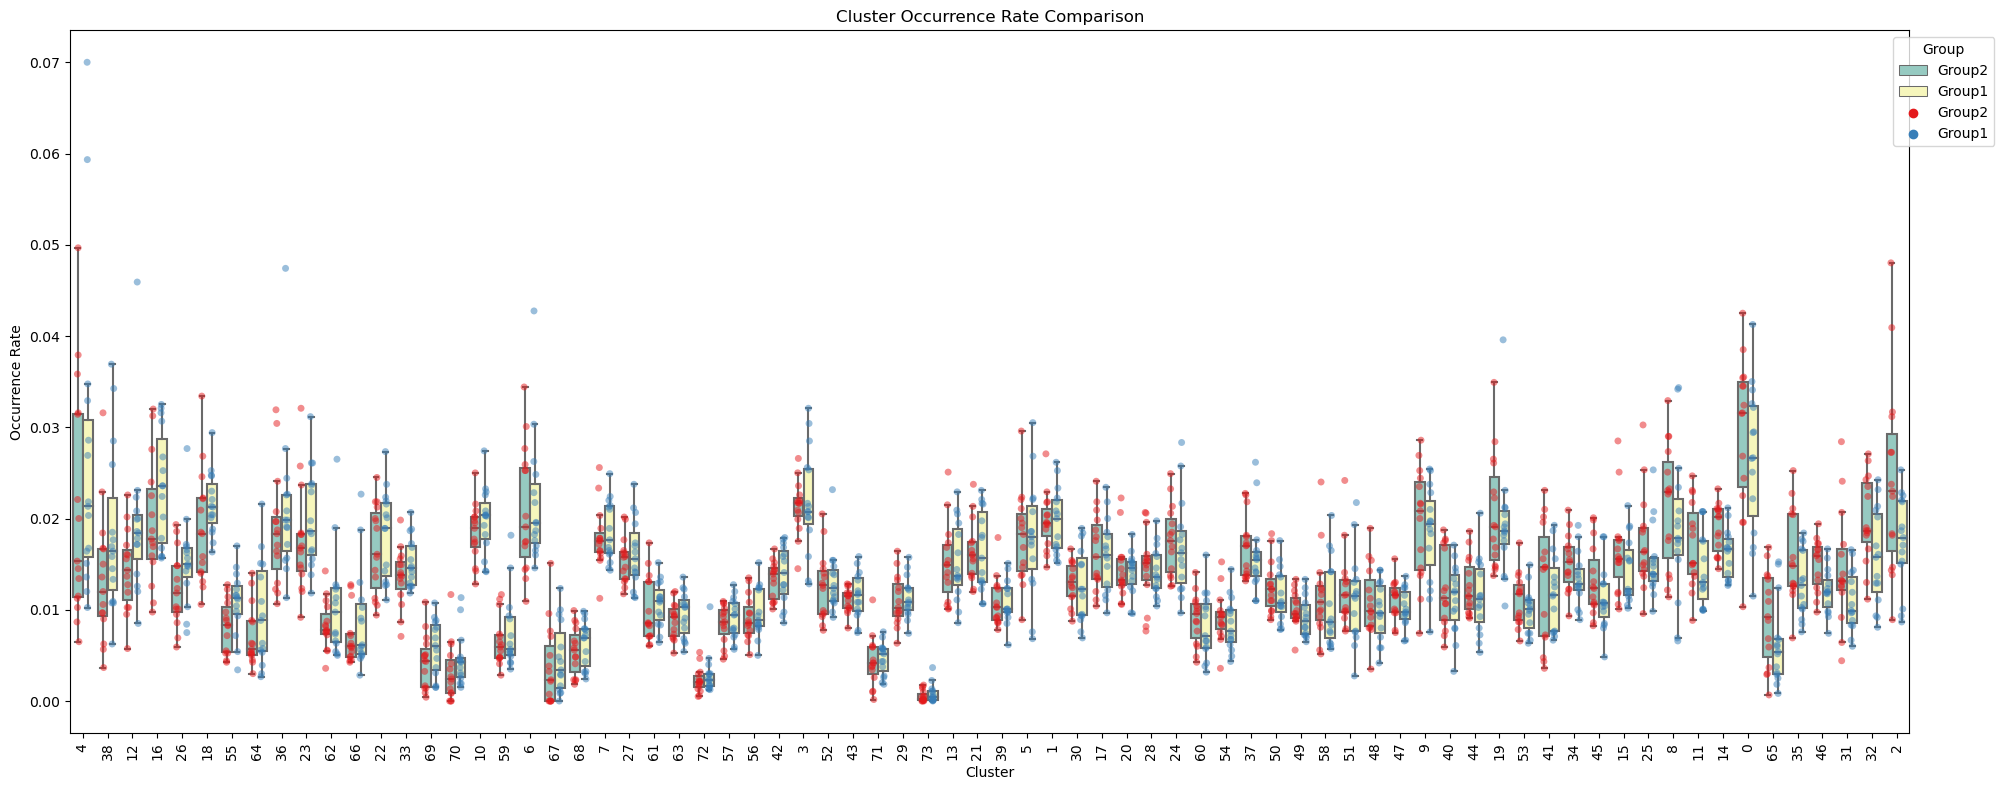

In [5]:
# Plot box-whisker plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sorted_indices를 기준으로 DataFrame의 순서를 재조정하는 함수
def reorder_dataframe(df, sorted_indices, cluster_label='index'):
    # sorted_indices에 따라 순서를 재조정
    order_dict = {cluster: order for order, cluster in enumerate(sorted_indices)}
    # 'index' 컬럼에 새로운 순서를 매핑하여 'sorted_order' 컬럼 생성
    df['sorted_order'] = df[cluster_label].map(order_dict)
    # 'sorted_order'에 따라 DataFrame 정렬
    df_sorted = df.sort_values(by='sorted_order')
    return df_sorted

# 두 DataFrame을 긴 형식으로 변환
melted1 = cluster_counts1.reset_index().melt(id_vars='index', var_name='file', value_name='occurrence_rate')
melted1['group'] = group1

melted2 = cluster_counts2.reset_index().melt(id_vars='index', var_name='file', value_name='occurrence_rate')
melted2['group'] = group2

# 두 DataFrame을 합치기
combined_melted = pd.concat([melted1, melted2])

# 각 DataFrame의 'index'를 sorted_indices에 따라 재배열
combined_melted_sorted = reorder_dataframe(combined_melted, sorted_indices)

# Plot의 크기를 더 크게 설정하여 가로 길이를 늘립니다.
plt.figure(figsize=(20, 8))  # 가로 길이를 20으로 늘림

# Boxplot을 그립니다. dodge 값을 True로 설정하여 그룹 간 간격을 조정합니다.
sns.boxplot(x='sorted_order', y='occurrence_rate', hue='group', data=combined_melted_sorted, palette='Set3', showfliers=False, dodge=True)

# Stripplot을 그립니다. dodge 값을 True로 설정하여 그룹 간 간격을 조정합니다.
sns.stripplot(x='sorted_order', y='occurrence_rate', hue='group', data=combined_melted_sorted, palette='Set1', dodge=True, alpha=0.5, jitter=True)

plt.title('Cluster Occurrence Rate Comparison')
plt.xlabel('Cluster')
plt.ylabel('Occurrence Rate')

# 라벨의 겹침을 방지하기 위해 rotation 값을 조정합니다.
plt.xticks(range(len(sorted_indices)), labels=sorted_indices, rotation=90)  # x축 라벨을 세로로 배치

plt.legend(title='Group', loc='upper right', bbox_to_anchor=(1.05, 1))  # 범례 위치 조정

plt.tight_layout()  # Plot의 레이아웃을 자동으로 조정

# Save the figure
filename_save = cluster_name + '_box_whisker_' + group1 + ',' + group2
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.pdf'), transparent=True, dpi=300)
plt.savefig(os.path.join(SAVE_DIR, filename_save +'.png'), transparent=False, dpi=300)

plt.show()

### Save statistics results comparing behavioral usage

In [4]:
# Assumption: cluster_counts1 and cluster_counts2 are DataFrames that represent the occurrence rate of a cluster for each file.
# Combine this data, and add a group label.
combined_data = pd.concat([
    cluster_counts1.melt(var_name='file_name', value_name='occurrence_rate', ignore_index=False).assign(Group='Group1'),
    cluster_counts2.melt(var_name='file_name', value_name='occurrence_rate', ignore_index=False).assign(Group='Group2')
]).reset_index().rename(columns={'index': cluster_name})

# combined_data should be a DataFrame containing cluster, occurrence_rate, and Group.
results = asstats.perform_kruskal_wallis_with_permutation(combined_data, cluster_name)
results_fdr = asstats.apply_fdr_correction(results)

for index, row in results_fdr.iterrows():
    asstats.visualize_permutation_results(row[cluster_name], row['kw_stat'], row['perm_stats'], os.path.join(SAVE_DIR, cluster_name + '_' + group1 + ',' + group2 + 'permutation_figures'))

# Add mean values and error bar ranges to the results_fdr DataFrame
results_fdr['group1_mean'] = [group1_means[cluster] for cluster in results_fdr[cluster_name]]
results_fdr['group2_mean'] = [group2_means[cluster] for cluster in results_fdr[cluster_name]]

# Extract lower and upper error values for each group based on sorted_indices and add them to the DataFrame
results_fdr['group1_error_lower'] = [group1_errors[sorted_indices.tolist().index(cluster)][0] for cluster in results_fdr[cluster_name]]
results_fdr['group1_error_upper'] = [group1_errors[sorted_indices.tolist().index(cluster)][1] for cluster in results_fdr[cluster_name]]
results_fdr['group2_error_lower'] = [group2_errors[sorted_indices.tolist().index(cluster)][0] for cluster in results_fdr[cluster_name]]
results_fdr['group2_error_upper'] = [group2_errors[sorted_indices.tolist().index(cluster)][1] for cluster in results_fdr[cluster_name]]

excel_file_name = 'results_fdr_' + cluster_name + '_' + group1 + ',' + group2 + '.xlsx'  # set the name of the excel file
excel_save_path = os.path.join(SAVE_DIR, excel_file_name)   # set the path to save the excel file
results_fdr.to_excel(excel_save_path, index=False)  # save the results to excel file

print(f"Results saved to {excel_save_path}")

Cluster 0 - Raw P-Value: 0.25
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\SDSBD\results1\group_comparison\preSD\dendiff\subcluster_preSD_S_extreme,preSD_Rpermutation_figures\permutation_test_cluster_0.png
Cluster 1 - Raw P-Value: 0.896
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\SDSBD\results1\group_comparison\preSD\dendiff\subcluster_preSD_S_extreme,preSD_Rpermutation_figures\permutation_test_cluster_1.png
Cluster 2 - Raw P-Value: 0.074
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\SDSBD\results1\group_comparison\preSD\dendiff\subcluster_preSD_S_extreme,preSD_Rpermutation_figures\permutation_test_cluster_2.png
Cluster 3 - Raw P-Value: 0.838
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\SDSBD\results1\group_comparison\preSD\dendiff\subcluster_preSD_S_extreme,preSD_Rpermutation_figures\permutation_test_cluster_3.png
Cluster 4 - Raw P-Value: 0.324
Figure saved to C:\Users\MyPC\Desktop\git\after_subtle\Project\SDSBD\r

Transition probability 
- Not same with bigram prob. bigram은 전체 matrix로 나눔. 그 자체로 subcluster occupancy를 포함하고 있기 때문에 완전 독립적이라 보기 힘들고, 따라서 transition prob.가 적합하다고 생각.
- Occurrence rate까지 반영한 전반적인 양상을 보고 싶다면 bigram prob.를 살펴보는 것도 좋음.
- 참고(transition은 각 행(input subcluster)의 합이 1이 되도록 bigram normalization함)

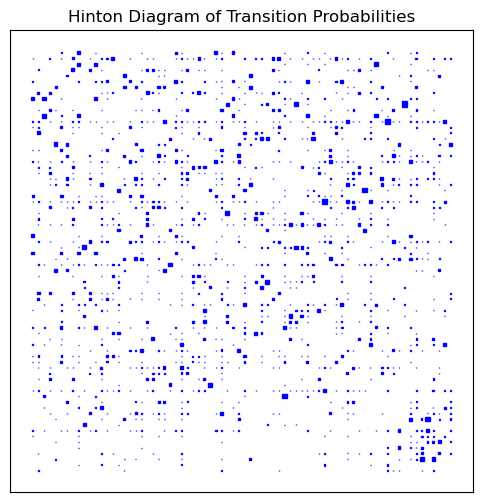

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Transition probabilities 불러오기
def load_transition_probabilities(folder_list):
    transition_matrices = []
    for folder in folder_list:
        file_path = os.path.join(folder, 'transition_probabilities.csv')
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path, header=None)
            transition_matrices.append(df.values)
    return np.mean(transition_matrices, axis=0)

# 그룹별 평균 transition matrix 계산
group1_transition = load_transition_probabilities(group1_folder_list)
group2_transition = load_transition_probabilities(group2_folder_list)

# 통계적 차이 검정
p_values = np.zeros(group1_transition.shape)  # 가정: 두 그룹의 transition matrix는 동일한 shape를 가짐

for i in range(group1_transition.shape[0]):
    for j in range(group1_transition.shape[1]):
        stat, p = stats.mannwhitneyu(group1_transition[i, j], group2_transition[i, j], alternative='two-sided')
        p_values[i, j] = p

# FDR 조정
_, p_adj, _, _ = multipletests(p_values.flatten(), method='fdr_bh')
p_adj = p_adj.reshape(p_values.shape)

# Hinton diagram 시각화
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('white')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'blue' if w > 0 else 'red'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


# Example code
plt.figure(figsize=(6, 6))
hinton(group1_transition)
plt.title("Hinton Diagram of Transition Probabilities")
plt.show()


Extract coords in a specific subcluster

In [1]:
import after_subtle.module as asmod
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import sys
sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl

group_name = 'setd1a_male_het'
subcluster_number = 30
dur_thres = 5
pre = 10
post = 20

folder_list = acl.get_csv_paths(DIR[group_name]) # directory of the data extracted from the subtle
coords_folder = COORDS_DIR[group_name] # directory of the coordinates of groups
SAVE_DIR = os.path.join(SAVE_DIR_LIST[group_name],'behaviors_in_subcluster')  # directory to save the analysis from after_subtle
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

# extract coordinates from a speicifc subcluster
frames = []
coords = pd.DataFrame()
for folder in folder_list:
    subcluster_file = os.path.join(folder, 'subclusters.csv')
    if os.path.isfile(subcluster_file):
        subclusters = pd.read_csv(subcluster_file, header=None)

        folder_name = os.path.basename(folder)
        coords_file = os.path.join(coords_folder, folder_name + '.csv')
        if os.path.isfile(coords_file):
            coords_data = pd.read_csv(coords_file, header=None)
            frames_in_subcluster, coords_in_subcluster = asmod.find_consecutive_groups(subclusters, coords_data, subcluster_number, dur_thres, pre=pre, post=post)

            frames.extend(frames_in_subcluster)
            coords = pd.concat([coords, coords_in_subcluster])

#coords.to_csv(DIR[group_name]+'/'+group_name+'_coords_subcluster'+str(subcluster_number)+'.csv', header=None, index=None)
#coords.to_csv(os.path.join(SAVE_DIR, group_name+'_subcluster'+str(subcluster_number)+'.csv'), header=None, index=None)


NameError: name 'DIR' is not defined